# Example joint fit

### Loading juliet and juliet_mods

In [1]:
import juliet
import juliet_mods as jm

### Reading the priors from a file

In [2]:
priors = jm.PriorList.read_prior_file(f'./jointfit_toi141.priors')

### Reading the datafiles

In [3]:
data = jm.Data()
data.add_rv('./rvs_toi141.vels')
data.add_photometry('https://archive.stsci.edu/hlsps/tess-data-alerts/'+\
                              'hlsp_tess-data-alerts_tess_phot_00403224672-'+\
                              's01_tess_v1_lc.fits')

### Loading the data into juliet and running the fit

In [4]:
julobj = juliet.load(priors=priors.priordict,
                     t_rv=data.t_rvs,
                     y_rv=data.rvs,
                     yerr_rv=data.rvs_err,
                     t_lc=data.t_fluxes,
                     y_lc=data.fluxes,
                     yerr_lc=data.fluxes_err,
                     out_folder=f'./joint_fit')
results = julobj.fit(
    sampler='dynamic_dynesty',
    nthreads=6,
    n_live_points=500,
)


Detected dynamic_dynesty sampler output files --- extracting from ./joint_fit/_dynesty_DNS_posteriors.pkl


### Some helpful functions

In [5]:
jm.append_lnZ(results)
jm.get_rv_residuals(results)
jm.get_lc_residuals(results)

### Plotting the radial velocity curves

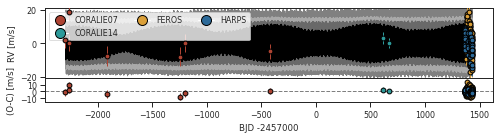

In [6]:
jm.plot_rv(results, show=True)

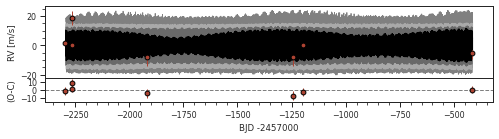

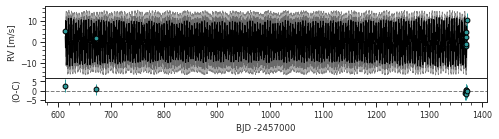

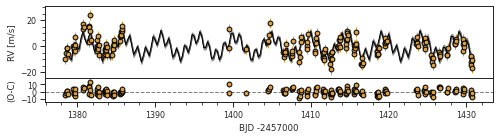

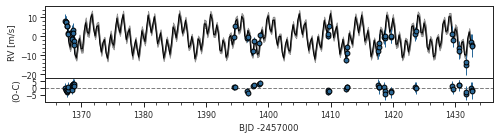

In [7]:
jm.plot_rv_indv_panels(results, show=True)

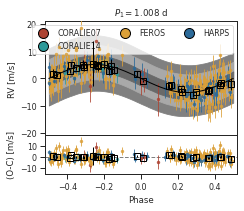

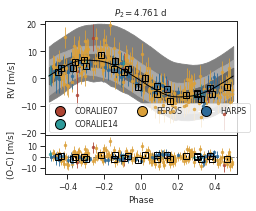

In [8]:
jm.plot_phased_rvs(results, hide_uncertainty=False, show_binned=True, show=True)

### Plotting the photometry

TESS


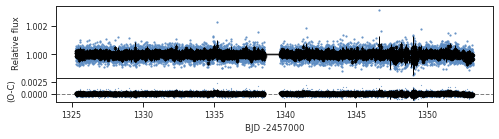

In [9]:
jm.plot_lc_indv_panels(results, show=True)

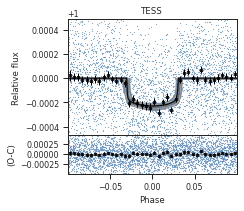

In [10]:
jm.plot_phased_lcs(results, minphase=-0.1, maxphase=0.1, show=True)

### Corner plots of the posterior

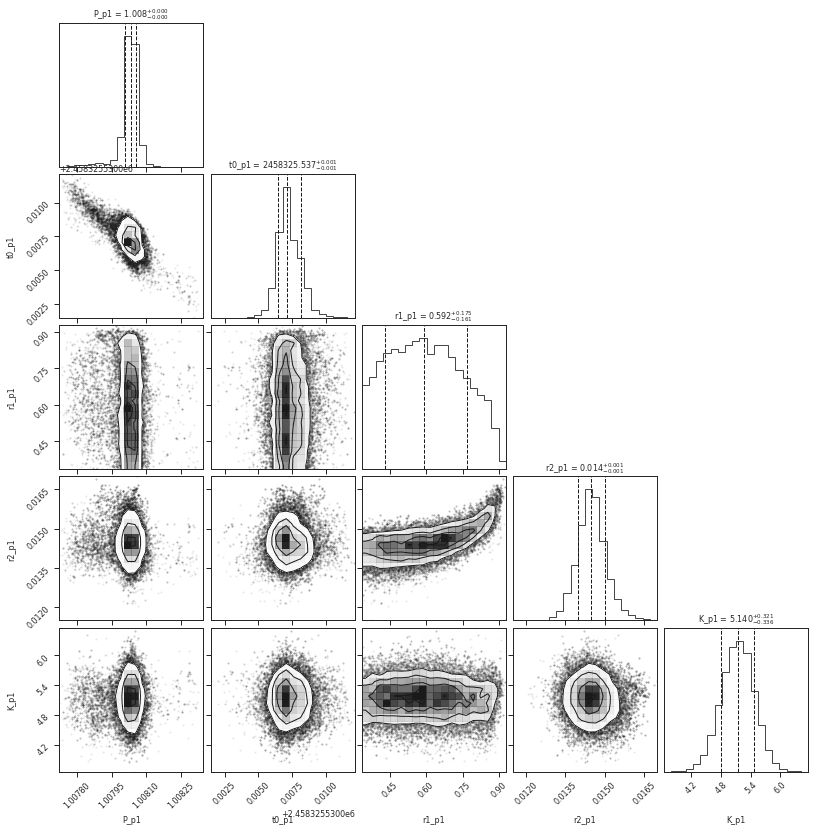

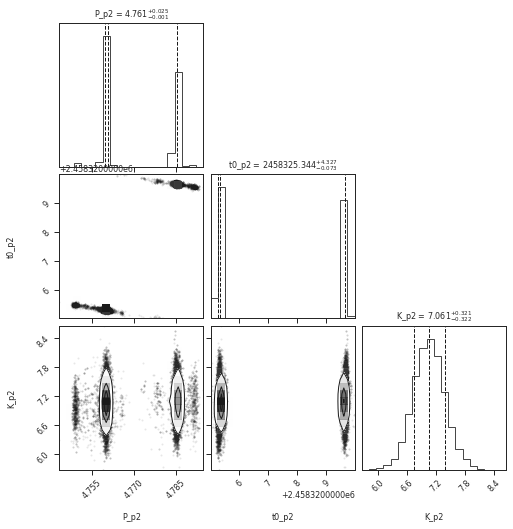

In [11]:
for pnum in range(1, results.data.n_rv_planets + 1):
    jm.plot_corner(results,
                   subset=[f'_p{pnum}'],
                   plot_datapoints=True,
                   show=True)


### Creating posterior tables

In [12]:
jm.create_planet_posterior_table(results)
jm.create_planet_param_table(results,
                             R_star=[1.1011, 0.008],
                             M_star=[1.068, 0.020],
                             L_star=[1.376, 0.049],
                             T_star=[5985, 50],
                             Kmag=[6.419, 0.019],
                             Jmag=[6.806, 0.015],
                             saveformat='LaTeX')


Parameter,Posterior P$_1$\tablefootmark{'(a)'},Posterior P$_2$\tablefootmark{'(a)'},Units
str49,str49,str49,str49
$p = R_{\rm p}/R_\star$,$\num{0.01448}^{+\num{0.00053}}_{-\num{0.00051}}$,\dots,\dots
$b = (a_{\rm p}/R_\star)\cos i_{\rm p}$,$\num{0.39}^{+\num{0.27}}_{-\num{0.25}}$,\dots,\dots
$a_{\rm p}/R_\star$,$\num{4.86}^{+\num{0.44}}_{-\num{0.78}}$,\dots,\dots
$i_{\rm p}$,$\num{85.5}^{+\num{3.0}}_{-\num{4.6}}$,\dots,deg
$M_{\rm p}$,$\num{8.47}^{+\num{0.55}}_{-\num{0.57}}$,\dots,$M_\oplus$
$M_{\rm p}\sin i$,$\num{8.42}^{+\num{0.54}}_{-\num{0.56}}$,$\num{19.41}^{+\num{0.92}}_{-\num{0.92}}$,$M_\oplus$
$R_{\rm p}$,$\num{1.739}^{+\num{0.065}}_{-\num{0.062}}$,\dots,$R_\oplus$
$\rho_{\rm p}$,$\num{8.8}^{+\num{1.3}}_{-\num{1.1}}$,\dots,\si{\gram\per\centi\meter\cubed}
$g_{\rm p}$,$\num{27.4}^{+\num{2.9}}_{-\num{2.7}}$,\dots,\si{\meter\per\second\squared}
